# Визуализация данных

In [187]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,6

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Датасет находится по ссылке: https://www.kaggle.com/arslanali4343/top-personality-dataset

Содержит 2 файла: personality-data.csv, 2018_ratings.csv

**ОПИСАНИЕ ФАЙЛА personality-data.csv**

Данные содержат заголовоки, которые описываются следующим образом:

**Userid:** хэшированный идентификатор пользователя.

**Открытость:** оценочный балл (от 1 до 7), оценивающий склонность пользователя отдавать предпочтение новому опыту. 1 означает, что пользователь имеет тенденцию не отдавать предпочтение новому опыту, 7 означает, что пользователь имеет тенденцию отдавать предпочтение новому опыту.

**Приятность:** оценочный балл (от 1 до 7), оценивающий склонность пользователя к состраданию и сотрудничеству, а не к подозрительности и антагонизму по отношению к другим. 1 означает, что пользователь не склонен к состраданию и сотрудничеству. 7 означает, что пользователь склонен к состраданию и сотрудничеству.

**Эмоциональная стабильность:** оценочный балл (от 1 до 7), оценивающий склонность пользователя к психологическому стрессу. 1 означает, что пользователь имеет тенденцию испытывать психологический стресс, а 7 означает, что пользователь имеет тенденцию не испытывать психологического стресса.

**Добросовестность:** оценочный балл (от 1 до 7), оценивающий склонность пользователя быть организованным и надежным, а также проявлять самодисциплину. 1 означает, что у пользователя нет такой тенденции, а 7 означает, что у пользователя есть такая тенденция.

**Экстраверсия:** оценочный балл (от 1 до 7), оценивающий склонность пользователя к общению. 1 означает, что у пользователя нет такой тенденции, а 7 означает, что у пользователя есть такая тенденция.

**Обозназначенная метрика:** одна из следующих - случайность, популярность, разноплановость, отсутствует(none). Каждый пользователь, помимо оценки своей личности, оценивал свои предпочтения по списку из 12 фильмов, генерируемых с помощью метрик - случайность, популярность, разноплановость, отсутствует(none).

**Обозначенное условие:** одно из следующих (высокое, среднее, низкое). На основе обозначенной метрики и обозначенного условия был сгенерирован список фильмов для пользователей. Например: если назначенная метрика - это случайность, а назначенное условие - высокое, то фильмы в списке являются очень случайными.

**Movie_x (x - от 1 до 12):** список состоит из 12 фильмов. Эти поля содержат идентификаторы двенадцати фильмов в списке.

**Predictedratingx (x - от 1 до 12):** прогнозируемый рейтинг соответствующего movie_x для пользователя.

**Is_Personalized:** ответ пользователя на вопрос - "этот список фильмов персонализирован под вас?". Пользователи отвечали по 5-балльной шкале Лайкерта (1: категорически не согласен, 5: категорически согласен).

**Enjoy_watching:** ответ пользователя на вопрос - "этот список содержит фильмы, которые как вы думаете, вам понравятся?". Пользователи отвечали по 5-балльной шкале Лайкерта (1: категорически не согласен, 5: категорически согласен).

**Файл ratings.csv содержит заголовоки:**

**userId:** хэшированный идентификатор пользователя.

**movieId:** идентификатор фильма

**рейтинг:** рейтинг (от 0,5 до 5 звезд), поставленный пользователем.

**tstamp:** когда пользователь оценил фильм.

In [188]:
#сократим таблицу для более удобного анализа. уберем столбцы с предлагаемыми фильмами для просмотра и столбцы с прогнозируемыми оценками к ним.
personality = pd.read_csv('archive/personality-data.csv', names=['user_id', 'openness', 'agreeableness', 'emotional_stability', 'conscientiousness', 'extraversion', 'assigned metric', 'assigned condition', 1, 111, 2, 22, 3, 33, 4, 44, 5, 55, 6, 66, 7, 77, 8, 88, 9, 99, 10, 1010, 11, 1111, 12, 1212, 'how_is_personalized', 'enjoy_watching'], header=0)
personality1 = personality.drop([1, 111, 2, 22, 3, 33, 4, 44, 5, 55, 6, 66, 7, 77, 8, 88, 9, 99, 10, 1010, 11, 1111, 12, 1212], axis=1)
personality1

,user_id,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,how_is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2,3
...,...,...,...,...,...,...,...,...,...,...
1829,cff910b71f09b3120289ff6b461a9e03,5.5,3.5,2.5,4.0,5.5,popularity,low,3,3
1830,1ab3a4c2921d8da640854819b0f6cfce,4.0,3.5,4.5,4.0,2.5,serendipity,high,3,4
1831,a06386edadf3bc614dadb7044708c46c,6.0,3.0,5.5,3.5,6.0,serendipity,low,3,4
1832,bad56d9506832cd79d874a6b66b3d813,5.0,3.5,1.5,3.5,2.5,serendipity,medium,4,4


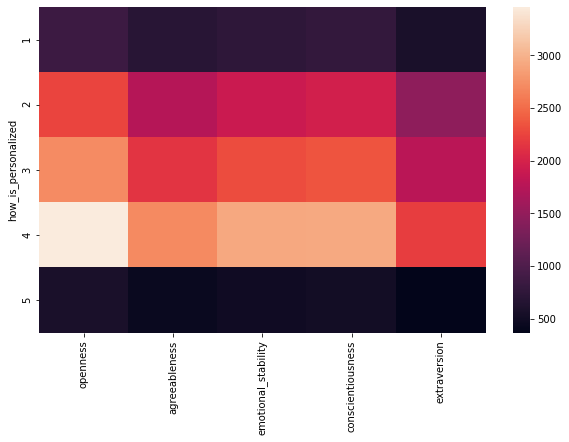

In [189]:
#посмотрим понравилась ли пользователям выборка фильмов, которая им предлагалась после "персонализации" (пользователи оценивали свои качества - Открытость, Приятность, Эмоциональная стабильность, Добросовестность, Экстраверсия)
personality2 = personality1[['openness', 'agreeableness', 'emotional_stability', 'conscientiousness', 'extraversion','how_is_personalized']].groupby('how_is_personalized').sum()
ax = sns.heatmap(personality2)

На Heatmap видно, что оценок 5 и 1 было намного меньше, чем оценок в 2, 3, 4. Наиболее положительно выборку фильмов, которая предлагалась в результате персонализации, оценили люди с качеством Открытость(openness). Также на Heatmap видно, что люди меньше, чем другие качества, находили в себе экстраверсию (extraversion) и приятность (agreeableness) и больше всего  Открытость(openness), Эмоциональную стабильность (emotional_stability) и добросовестность (conscientiousness).

По графику внизу (отражает то, как пользователи оценили сгенерированные для них списки фильмов) можно понять, что пятерки ставились даже реже, чем единицы, а оценка 4 ставилась чаще всего.

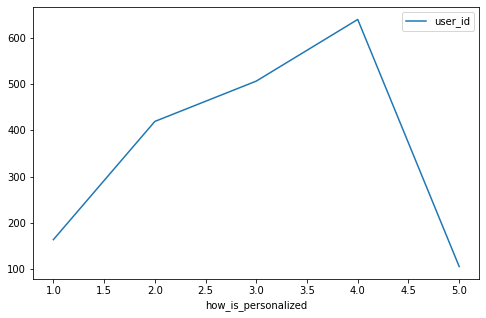

In [151]:
personality1[['how_is_personalized','user_id']].groupby('how_is_personalized').count().plot()

In [191]:
personality3 = personality1[['openness', 'agreeableness', 'emotional_stability', 'conscientiousness', 'extraversion']]
personality3

,openness,agreeableness,emotional_stability,conscientiousness,extraversion
0,5.0,2.0,3.0,2.5,6.5
1,7.0,4.0,6.0,5.5,4.0
2,4.0,3.0,4.5,2.0,2.5
3,5.5,5.5,4.0,4.5,4.0
4,5.5,5.5,3.5,4.5,2.5
...,...,...,...,...,...
1829,5.5,3.5,2.5,4.0,5.5
1830,4.0,3.5,4.5,4.0,2.5
1831,6.0,3.0,5.5,3.5,6.0
1832,5.0,3.5,1.5,3.5,2.5


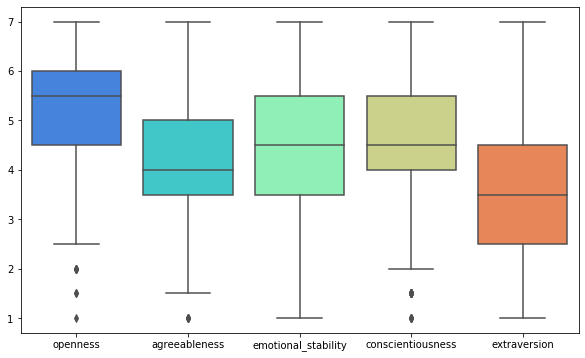

In [192]:
aj = sns.boxplot(data=personality3, palette='rainbow')

По boxplot можно увидеть, что характеристику "открытость" пользователи находили в себе легче, чем остальные качества (медиана составляет примерно 5.5 при максимальном показателе 7). Есть выбросы с показателями открытости - 1, 1.5, 2.0. Меньше всего находили в себе экстраверсию (медиана 3.5), выбросы отсутствуют. Равномерно распределяются показатели Эмоциональной стабильности (верхний квартиль и нижний квартиль примерно одинаковые при медиане 4.5). Все ящики приемлимых размеров, поэтому можно говорить о единогласии оценок своих качеств пользователями.

In [77]:
#посмотрим, что находится в файле 2018_ratings.csv
ratings = pd.read_csv('archive/2018_ratings.csv', names=['user_id', 'movie_id', 'rating', 'value_time'], header=0)
ratings

,user_id,movie_id,rating,value_time
0,8e7cebf9a234c064b75016249f2ac65e,1,5.0,2001-09-10 17:19:56
1,8e7cebf9a234c064b75016249f2ac65e,2,4.0,2001-09-28 11:34:55
2,8e7cebf9a234c064b75016249f2ac65e,3,4.0,2001-09-28 11:42:50
3,8e7cebf9a234c064b75016249f2ac65e,5,5.0,2001-09-28 11:27:30
4,8e7cebf9a234c064b75016249f2ac65e,6,4.0,2002-01-07 18:12:02
...,...,...,...,...
1028746,721ea658e148fc0f76ddd6e2b0e02422,95167,1.5,2015-10-14 10:39:15
1028747,721ea658e148fc0f76ddd6e2b0e02422,103335,4.5,2015-10-14 10:21:55
1028748,721ea658e148fc0f76ddd6e2b0e02422,104374,3.5,2015-10-12 01:05:38
1028749,721ea658e148fc0f76ddd6e2b0e02422,107890,4.0,2015-10-14 05:30:08


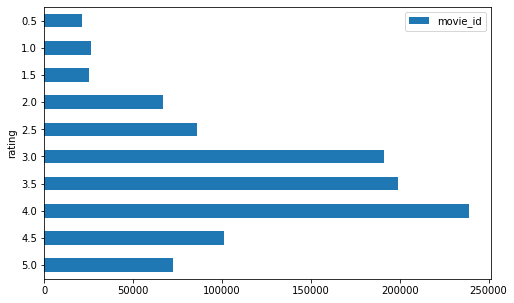

In [122]:
#определим какие оценки пользователи чаще всего ставили фильмам

ratings1 = ratings.groupby('rating').count().sort_values('rating', ascending=False)
ratings1.drop(['value_time','user_id'], axis = 1).plot.barh()

In [ ]:
По графику видно, что чаще всего пользователи ставили оценки от 3.0 до 4.0. Оценку 5.0 ставили также редко, как и 2.0.

По-моему мнению, по данным можно сделать вывод о том, что пользователи отвечают примерно одинаково по поводу своих личных характеристик, и ставят примерно одинаковые оценки, что спискам фильмов, которые для них персонально сгенироровали, то самим фильмам. Но что примечательно максимальный балл ставят крайне неохотно.